<a href="https://colab.research.google.com/github/soph-loaf/aht_project/blob/main/ReadingDataFromWundergound.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Sophia Ladyzhets, sal2213

Partner: Sally Green

## Reading Data from Wunderground

### Objective:

Scrape data from Weather Underground webpages and make scatterplots of temperature readings taken at different weather stations over defined time intervals.

In [1]:
import requests
import pandas as pd
import numpy as np
import math

from matplotlib import pyplot as plt, dates as mdates
import datetime as datetime


### 1. Scrape data from Weather Underground station websites

In [2]:
def read_data_from_wu (station, start_date, end_date):
    date_range = pd.date_range(start=start_date, end=end_date)
    weatherdata = pd.DataFrame()   
    try:
        for dates in date_range:
            #print(str(dates.date()))
            url = 'https://www.wunderground.com/dashboard/pws/'+station+'/table/'+str(dates.date())+'/'+str(dates.date())+'/daily'
            rweather = requests.get(url)
            html = rweather.content
            htmldf = pd.read_html(html)
            wdata = htmldf[-1]
            wdata['Date'] = dates.date() 
            weatherdata = weatherdata.append(wdata)   
    except:
        print('something went wrong on ' + str(dates.date()))
    weatherdata.dropna(thresh=5)
    weatherdata.to_csv(station+'_wunderground_'+start_date+'_'+str(dates.date())+'.csv', index=False)

    return weatherdata



In [36]:
# read_data_from_wu('KNYNEWYO343', '2021-07-01', '2021-07-07')
# read_data_from_wu('KNYNEWYO1421', '2021-07-01', '2021-07-07')
# read_data_from_wu('KNYNEWYO1335', start_date='2021-07-01', end_date='2021-07-07')   ##no data (all empty :/)
# read_data_from_wu('KNYNEWYO1238', start_date='2021-07-01', end_date='2021-07-07')   ##some data, some empty values --> let's try it!

#----- preliminary testing complete, now collecting data for July 2022 for 11 stations in NYC ------#

# read_data_from_wu('KNYNEWYO1421', '2022-07-01', '2022-07-31')  #1 complete
# read_data_from_wu('KNYNEWYO1622', '2022-07-01', '2022-07-31')   #2
# read_data_from_wu('KNYNEWYO1238', '2022-07-01', '2022-07-31')   #3
# read_data_from_wu('KNYNEWYO1626', '2022-07-01', '2022-07-31')  #4
# read_data_from_wu('KNYNEWYO1571', '2022-07-01', '2022-07-31')  #5
# read_data_from_wu('KNYNEWYO1300', '2022-07-01', '2022-07-31')  #6  ##6-8 are outside Manhattan
# read_data_from_wu('KNYNEWYO1651', '2022-07-01', '2022-07-31')  #7
# read_data_from_wu('KNYNEWYO1785', '2022-07-01', '2022-07-31')  #8 ##all nan values
# read_data_from_wu('KNYNEWYO1387', '2022-07-01', '2022-07-31')  #9
# read_data_from_wu('KNYNEWYO982', '2022-07-01', '2022-07-31')  #10
# read_data_from_wu('KNYNEWYO1615', '2022-07-01', '2022-07-31')  #11

first_day='2022-03-01'
last_day='2022-10-31'

# weather_station_list = [1421, 1622, 1238, 1626, 1571, 1300, 1651, 1387, 982, 1615]
wu_list = ['1421', '1622', '1238', '1626', '1571', '1300', '1651', '1387', '982', '1615']
# print('KNYNEWYO'+wu_list[0])


# read_data_from_wu('KNYNEWYO1421', first_day, last_day)  #1 complete
# read_data_from_wu('KNYNEWYO'+wu_list[0], first_day, last_day)  
# read_data_from_wu('KNYNEWYO'+wu_list[1], first_day, last_day)  
# read_data_from_wu('KNYNEWYO'+wu_list[2], first_day, last_day)  
# read_data_from_wu('KNYNEWYO'+wu_list[3], first_day, last_day)   
# read_data_from_wu('KNYNEWYO'+wu_list[4], first_day, last_day)   
# read_data_from_wu('KNYNEWYO1300', '2022-07-01', '2022-07-31')  #6  ##6-7 are outside Manhattan
# read_data_from_wu('KNYNEWYO1651', '2022-07-01', '2022-07-31')  #7
# read_data_from_wu('KNYNEWYO'+wu_list[7], first_day, last_day)   
# read_data_from_wu('KNYNEWYO'+wu_list[8], first_day, last_day)
# read_data_from_wu('KNYNEWYO'+wu_list[9], first_day, last_day)


something went wrong on 2022-08-16
something went wrong on 2022-03-10


,Time,Temperature,Dew Point,Humidity,Wind,Speed,Gust,Pressure,Precip. Rate.,Precip. Accum.,UV,Solar,Date
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-03-01
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-03-02
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-03-03
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-03-04
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-03-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,11:39 PM,41.5 °F,--,75 °%,North,--,--,29.82 °in,--,--,NaN,w/m²,2022-03-09
285,11:44 PM,41.2 °F,--,75 °%,North,--,--,29.83 °in,--,--,NaN,w/m²,2022-03-09
286,11:49 PM,41.0 °F,--,75 °%,North,--,--,29.83 °in,--,--,NaN,w/m²,2022-03-09
287,11:54 PM,40.8 °F,--,75 °%,North,--,--,29.83 °in,--,--,NaN,w/m²,2022-03-09


### 2. Load data from .csv into pandas dataframe

In [61]:
#maybe just stick w previous method

#read data from csv into pandas dataframe
# data_list = []
# # for i in range(len(wu_list)):
# for i in range(1,4):
#     # data = pd.read_csv('../aht_project/wu_data/KNYNEWYO'+wu_list[i]+'_wunderground_'+first_day+'_'+last_day+'.csv')
#     data = pd.read_csv('../aht_project/wu_data/KNYNEWYO'+wu_list[i]+'_wunderground_'+first_day+'_'+last_day+'.csv')
#     data_list.append(data)

# # data_1421_mn8th = pd.read_csv('../aht_project/wu_data/KNYNEWYO'+wu_list[0]+'_wunderground_'+first_day+'_'+last_day+'.csv')
# # data_1622_mn8th = pd.read_csv('../aht_project/wu_data/KNYNEWYO'+wu_list[1]+'_wunderground_'+first_day+'_'+last_day+'.csv')

# print(data_list)


In [39]:
def get_temp(data):
    x = list(data['Date'])
    for i in range(len(x)):
        x[i] = datetime.datetime.fromisoformat(x[i])
    # x[:] = datetime.fromisoformat(x[:])
    T = data['Temperature']
    # T = conv_temp(list(data['Temperature']))
    x = np.array(x)
    T = np.array(T)

    return x, T

In [56]:
#load data for July 2022 temp readings from csv file into pandas dataframe
# ex) data_343 = pd.read_csv('../aht_project/wu_data/KNYNEWYO343_wunderground_2021-07-01_2021-07-07.csv')
data_1421 = pd.read_csv('../aht_project/wu_data/KNYNEWYO1421_wunderground_2022-07-01_2022-07-31.csv')
data_1622 = pd.read_csv('../aht_project/wu_data/KNYNEWYO1622_wunderground_2022-07-01_2022-07-31.csv')
data_1238 = pd.read_csv('../aht_project/wu_data/KNYNEWYO1238_wunderground_2022-07-01_2022-07-31.csv')   ## has empty 'nan' values so ignoring for now
data_1626 = pd.read_csv('../aht_project/wu_data/KNYNEWYO1626_wunderground_2022-07-01_2022-07-31.csv')
data_1571 = pd.read_csv('../aht_project/wu_data/KNYNEWYO1571_wunderground_2022-07-01_2022-07-31.csv')
data_1300 = pd.read_csv('../aht_project/wu_data/KNYNEWYO1300_wunderground_2022-07-01_2022-07-31.csv')
data_1651 = pd.read_csv('../aht_project/wu_data/KNYNEWYO1651_wunderground_2022-07-01_2022-07-31.csv')
# data_1785 = pd.read_csv('../aht_project/wu_data/KNYNEWYO1785_wunderground_2022-07-01_2022-07-31.csv')   ## 1785 is all 'nan' values
data_1387 = pd.read_csv('../aht_project/wu_data/KNYNEWYO1387_wunderground_2022-07-01_2022-07-31.csv')
data_982 = pd.read_csv('../aht_project/wu_data/KNYNEWYO982_wunderground_2022-07-01_2022-07-31.csv')
data_1615 = pd.read_csv('../aht_project/wu_data/KNYNEWYO1615_wunderground_2022-07-01_2022-07-31.csv')

weather_data_list = [data_1421, data_1622, data_1238, data_1626, data_1571, data_1300, data_1651, data_1387, data_982, data_1615]

for i in range(len(weather_data_list)):
    weather_data_list[i] = weather_data_list[i].replace(
        to_replace='--', value=np.nan)
    weather_data_list[i] = weather_data_list[i].dropna(thresh=3)
    weather_data_list[i]['Temperature'] = weather_data_list[i]['Temperature'].str.strip(
        ' \xa0°F')
    weather_data_list[i]['Temperature'] = weather_data_list[i]['Temperature'].astype(
        float)

x_1421, T_1421 = get_temp(weather_data_list[0])
x_1622, T_1622 = get_temp(weather_data_list[1])
x_1238, T_1238 = get_temp(weather_data_list[2])
x_1626, T_1626 = get_temp(weather_data_list[3])
x_1571, T_1571 = get_temp(weather_data_list[4])
x_1300, T_1300 = get_temp(weather_data_list[5])
x_1651, T_1651 = get_temp(weather_data_list[6])
x_1387, T_1387 = get_temp(weather_data_list[7])
x_982, T_982 = get_temp(weather_data_list[8])
x_1615, T_1615 = get_temp(weather_data_list[9])


In [66]:
#read data for 8 months (March-October 2022)

data_0 = pd.read_csv('../aht_project/wu_data/KNYNEWYO'+wu_list[0]+'_wunderground_'+first_day+'_'+last_day+'.csv')
data_1 = pd.read_csv('../aht_project/wu_data/KNYNEWYO'+wu_list[1]+'_wunderground_'+first_day+'_'+last_day+'.csv')
data_2 = pd.read_csv('../aht_project/wu_data/KNYNEWYO'+wu_list[2]+'_wunderground_'+first_day+'_'+last_day+'.csv')
data_3 = pd.read_csv('../aht_project/wu_data/KNYNEWYO'+wu_list[3]+'_wunderground_'+first_day+'_'+last_day+'.csv')
data_4 = pd.read_csv('../aht_project/wu_data/KNYNEWYO'+wu_list[4]+'_wunderground_'+first_day+'_'+last_day+'.csv')
##temp load data_5 and data_6 as july only data since I don't have 8 mnths yet
data_5 = data_1300
data_6 = data_1651

data_7 = pd.read_csv('../aht_project/wu_data/KNYNEWYO'+wu_list[7]+'_wunderground_'+first_day+'_'+last_day+'.csv')
# data_8 = pd.read_csv('../aht_project/wu_data/KNYNEWYO'+wu_list[8]+'_wunderground_'+first_day+'_'+last_day+'.csv')
data_8 = pd.read_csv('../aht_project/wu_data/KNYNEWYO'+wu_list[8]+'_wunderground_'+first_day+'_'+'2022-08-16.csv')
# data_9 = pd.read_csv('../aht_project/wu_data/KNYNEWYO'+wu_list[9]+'_wunderground_'+first_day+'_'+last_day+'.csv')
data_9 = pd.read_csv('../aht_project/wu_data/KNYNEWYO'+wu_list[9]+'_wunderground_'+first_day+'_.csv')


In [68]:

# weather_data_list = [data_1421, data_1622, data_1238, data_1626, data_1571, data_1300, data_1651, data_1387, data_982, data_1615]
weather_data_list = [data_0, data_1, data_2, data_3, data_4, data_5, data_6, data_7, data_8, data_9]
# weather_data_list = data_list

for i in range(len(weather_data_list)):
    weather_data_list[i] = weather_data_list[i].replace(to_replace='--', value=np.nan)
    weather_data_list[i]= weather_data_list[i].dropna(thresh=3)
    weather_data_list[i]['Temperature'] = weather_data_list[i]['Temperature'].str.strip(' \xa0°F')
    weather_data_list[i]['Temperature'] = weather_data_list[i]['Temperature'].astype(float)
    # weather_data_list[i]['Date'][:] = datetime.datetime.fromisoformat(weather_data_list[i]['Date'][:])    
    
x_data0, T_data0 = get_temp(weather_data_list[0])
x_data1, T_data1 = get_temp(weather_data_list[1])
x_data2, T_data2 = get_temp(weather_data_list[2])
x_data3, T_data3 = get_temp(weather_data_list[3])
x_data4, T_data4 = get_temp(weather_data_list[4])
x_data5, T_data5 = get_temp(weather_data_list[5])
x_data6, T_data6 = get_temp(weather_data_list[6])
x_data7, T_data7 = get_temp(weather_data_list[7])
x_data8, T_data8 = get_temp(weather_data_list[8])
x_data9, T_data9 = get_temp(weather_data_list[9])




### 3. Plot the temperature distributions

In [ ]:
# wu_list = ['1421', '1622', '1238', '1626', '1571', '1300', '1651', '1387', '982', '1615']
# x_data_list = []
# T_data_list = []
# for i in range(len(wu_list)):
#     x_data_list.append

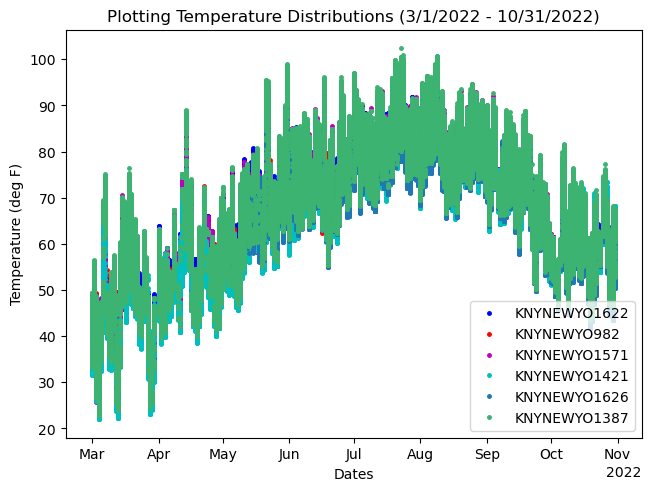

In [95]:
# wu_list = ['1421', '1622', '1238', '1626', '1571', '1300', '1651', '1387', '982', '1615']

# plotting 8 months of weather data

fig = plt.figure(constrained_layout = True)
ax = plt.gca()
locator = mdates.AutoDateLocator()
formatter = mdates.ConciseDateFormatter(locator)
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)
ax.plot(x_data1, T_data1, 'bo', markersize=2.5, label='KNYNEWYO1622')  ##close to Central Park (uptown - Harlem)
ax.plot(x_data8, T_data8, 'ro', markersize=2.5, label='KNYNEWYO982')   ##close to Central Park (Hells Kitchen)
# ax.plot(x_data9, T_data9, 'go', markersize=2.5, label='KNYNEWYO1615')  ##close to Central Park (Midtown)   ##stopped collecting data in March
ax.plot(x_data4, T_data4, 'mo', markersize=2.5, label='KNYNEWYO1571')  ##far from Central Park (downtown - Chelsea)
ax.plot(x_data0, T_data0, 'co', markersize=2.5, label='KNYNEWYO1421')  ##on the East River
ax.plot(x_data3, T_data3, 'o', markersize=2.5, label='KNYNEWYO1626')  
ax.plot(x_data7, T_data7, 'o', color='mediumseagreen', markersize=2.5, label='KNYNEWYO1387')  
# ax.plot(x_data5, T_data5, 'o', markersize=2.5, label='KNYNEWYO1300')  ##all nan values
# ax.plot(x_data6, T_data6, 'o', markersize=2.5, label='KNYNEWYO1651')   ##Long Island City
ax.set_xlabel("Dates")
ax.set_ylabel("Temperature (deg F)")
# ax.set_ylim([20.0, 105.0])
ax.set_title('Plotting Temperature Distributions (3/1/2022 - 10/31/2022)')
plt.legend(loc='lower right')
plt.show()

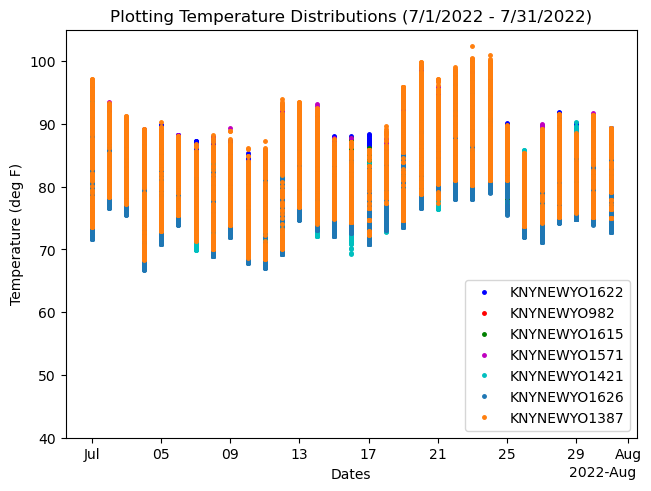

In [96]:
fig = plt.figure(constrained_layout = True)
ax = plt.gca()
locator = mdates.AutoDateLocator()
formatter = mdates.ConciseDateFormatter(locator)
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)
ax.plot(x_1622, T_1622, 'bo', markersize=2.5, label='KNYNEWYO1622')  ##close to Central Park (uptown - Harlem)
ax.plot(x_982, T_982, 'ro', markersize=2.5, label='KNYNEWYO982')   ##close to Central Park (Hells Kitchen)
ax.plot(x_1615, T_1615, 'go', markersize=2.5, label='KNYNEWYO1615')  ##close to Central Park (Midtown)
ax.plot(x_1571, T_1571, 'mo', markersize=2.5, label='KNYNEWYO1571')  ##far from Central Park (downtown - Chelsea)
ax.plot(x_1421, T_1421, 'co', markersize=2.5, label='KNYNEWYO1421')  ##on the East River
ax.plot(x_1626, T_1626, 'o', markersize=2.5, label='KNYNEWYO1626')  
ax.plot(x_1387, T_1387, 'o', markersize=2.5, label='KNYNEWYO1387')  
# ax.plot(x_1300, T_1300, 'o', markersize=2.5, label='KNYNEWYO1300')  ##all nan values
# ax.plot(x_1651, T_1651, 'o', markersize=2.5, label='KNYNEWYO1651')   ##Long Island City
ax.set_xlabel("Dates")
ax.set_ylabel("Temperature (deg F)")
ax.set_ylim([40.0, 105.0])
ax.set_title('Plotting Temperature Distributions (7/1/2022 - 7/31/2022)')
plt.legend(loc='lower right')
plt.show()


#### Calculating min and max temperatures per day

In [10]:

print(x_1421.shape, T_1421.shape)
print(x_1421[288:290], x_1421[577:579])
delta_x = 577-288

# x_1615[288:290]
# x_1615[577:579]
# x_1615.shape

def get_min_temp(T_arr):
    ind_T = T_arr>0
    T_proc = T_arr.copy()[ind_T]
    # T_min = np.zeros(int(T_arr.shape[0]/delta_x + 1))
    x_min = np.linspace(0, len(T_arr), delta_x)
    # x_bc_min = np.linspace(0, len(x_min))
    T_min = np.zeros(len(x_min))
    for i in range(len(T_min)-1):
        # T_min[i] = np.min(T_proc[int(x_min[i]):int(x_min[i+1])])
        T_min[int(x_min[i]):int(x_min[i+1])] = np.min(T_proc[int(x_min[i]):int(x_min[i+1])])

    return x_min, T_min

def get_minmax_temp(T_arr):
    ind_T = T_arr>0
    T_proc = T_arr.copy()[ind_T]
    # T_min = np.zeros(int(T_arr.shape[0]/delta_x + 1))
    x_min = np.linspace(0, len(T_arr), delta_x)
    # x_bc_min = np.linspace(0, len(x_min))
    T_min = np.zeros(len(x_min))
    T_max = T_min.copy()
    for i in range(len(T_min)-1):
        # T_min[i] = np.min(T_proc[int(x_min[i]):int(x_min[i+1])])
        T_min[int(x_min[i]):int(x_min[i+1])] = np.min(T_proc[int(x_min[i]):int(x_min[i+1])])
        T_max[int(x_min[i]):int(x_min[i+1])] = np.max(T_proc[int(x_min[i]):int(x_min[i+1])])

    return x_min, T_min, T_max



(8926,) (8926,)
[datetime.datetime(2022, 7, 2, 0, 0) datetime.datetime(2022, 7, 2, 0, 0)] [datetime.datetime(2022, 7, 3, 0, 0) datetime.datetime(2022, 7, 3, 0, 0)]


In [11]:
x_982[0].day  ##returns day (int) from a datetime object



1

In [12]:
#yeah I need to rewrite my min temp fxn.. or is there a way to interact with this using pandas fxns?
# I think there should be pandas functions for this..
#want to iterate through the values in x_982[:].day and take the min temp over each corresponding temp range..



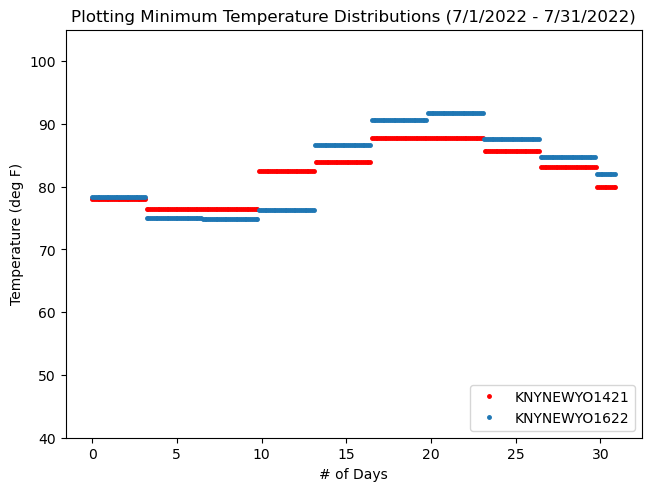

In [13]:
x_min_1421, T_min_1421 = get_min_temp(T_1421)
x_min_1622, T_min_1622 = get_min_temp(T_1622)
# x_min_1571, T_min_1571 = get_min_temp(T_1571)
# x_min_1651, T_min_1651 = get_min_temp(T_1651)
# x_min_982, T_min_982 = get_min_temp(T_982)
# x_min_1615, T_min_1615 = get_min_temp(T_1615)

fig = plt.figure(constrained_layout = True)
ax = plt.gca()
# locator = mdates.AutoDateLocator()
# formatter = mdates.ConciseDateFormatter(locator)
# ax.xaxis.set_major_locator(locator)
# ax.xaxis.set_major_formatter(formatter)
ax.plot(x_min_1421/delta_x, T_min_1421, 'or', markersize=2.5, label='KNYNEWYO1421')
ax.plot(x_min_1622/delta_x, T_min_1622, 'o', markersize=2.5, label='KNYNEWYO1622')
# ax.plot(x_1571, T_1571, 'o', markersize=2.5, label='KNYNEWYO1571')
# ax.plot(x_1651, T_1651, 'o', markersize=2.5, label='KNYNEWYO1651')
# ax.plot(x_982, T_982, 'o', markersize=2.5, label='KNYNEWYO982')
# ax.plot(x_1615, T_1615, 'o', markersize=2.5, label='KNYNEWYO1615')
ax.set_xlabel("# of Days")
ax.set_ylabel("Temperature (deg F)")
ax.set_ylim([40.0, 105.0])
ax.set_title('Plotting Minimum Temperature Distributions (7/1/2022 - 7/31/2022)')
plt.legend(loc='lower right')
plt.show()


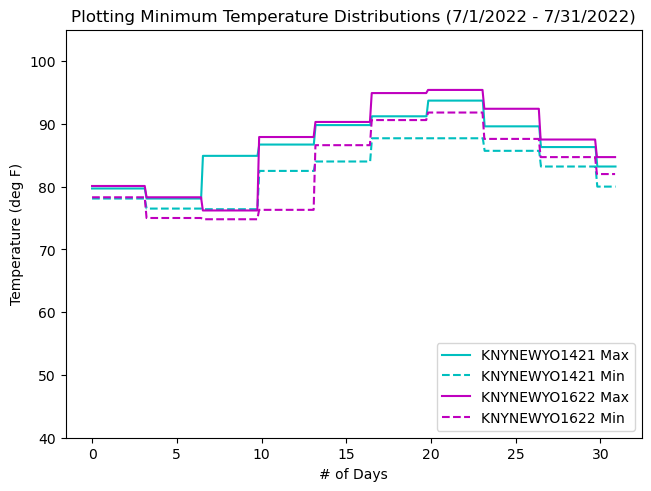

In [14]:
_, _, T_max_1421 = get_minmax_temp(T_1421)
_, _, T_max_1622 = get_minmax_temp(T_1622)


fig = plt.figure(constrained_layout = True)
ax = plt.gca()
# locator = mdates.AutoDateLocator()
# formatter = mdates.ConciseDateFormatter(locator)
# ax.xaxis.set_major_locator(locator)
# ax.xaxis.set_major_formatter(formatter)
ax.plot(x_min_1421/delta_x, T_max_1421, '-c', markersize=2.5, label='KNYNEWYO1421 Max')
ax.plot(x_min_1421/delta_x, T_min_1421, '--c', markersize=2.5, label='KNYNEWYO1421 Min')
ax.plot(x_min_1622/delta_x, T_max_1622, '-m', markersize=2.5, label='KNYNEWYO1622 Max')
ax.plot(x_min_1622/delta_x, T_min_1622, '--m', markersize=2.5, label='KNYNEWYO1622 Min')
# ax.plot(x_1571, T_1571, 'o', markersize=2.5, label='KNYNEWYO1571')
# ax.plot(x_1651, T_1651, 'o', markersize=2.5, label='KNYNEWYO1651')
# ax.plot(x_982, T_982, 'o', markersize=2.5, label='KNYNEWYO982')
# ax.plot(x_1615, T_1615, 'o', markersize=2.5, label='KNYNEWYO1615')
ax.set_xlabel("# of Days")
ax.set_ylabel("Temperature (deg F)")
ax.set_ylim([40.0, 105.0])
ax.set_title('Plotting Minimum Temperature Distributions (7/1/2022 - 7/31/2022)')
plt.legend(loc='lower right')
plt.show()


### Testing code

In [15]:
#date formatting testing:

# x = x_982.copy()
# for i in range(len(x)):
#         print(x[i])
#         x[i] = datetime.fromisoformat(x[i])
#         print(x[i])


In [16]:
#example code for formatting dates
#source: https://matplotlib.org/stable/api/dates_api.html

# base = datetime.datetime(2005, 2, 1)
# dates = np.array([base + datetime.timedelta(hours=(2 * i))
#                   for i in range(732)])
# N = len(dates)
# np.random.seed(19680801)
# y = np.cumsum(np.random.randn(N))

# fig, ax = plt.subplots(constrained_layout=True)
# locator = mdates.AutoDateLocator()
# formatter = mdates.ConciseDateFormatter(locator)
# ax.xaxis.set_major_locator(locator)
# ax.xaxis.set_major_formatter(formatter)

# ax.plot(dates, y)
# ax.set_title('Concise Date Formatter')

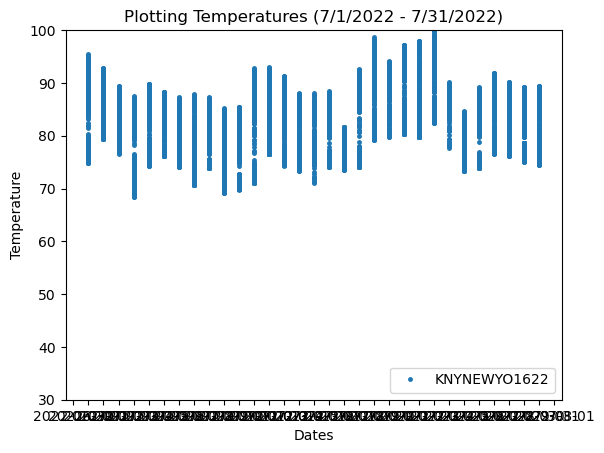

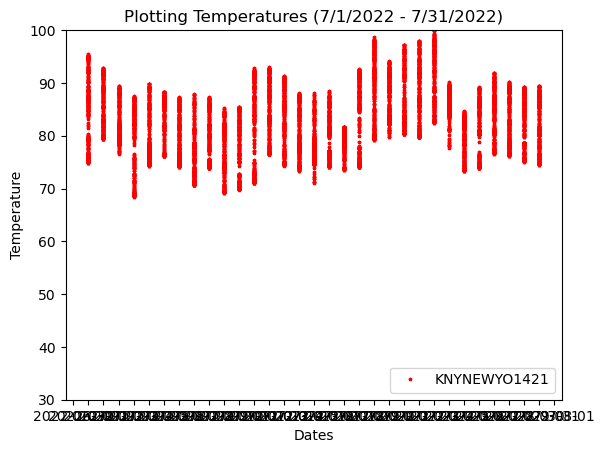

In [17]:

#making a scatter plot while omitting nan values
#defined custom y-range in order to avoid plotting zeroes
fig = plt.figure()
ax = plt.gca()
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))
ax.xaxis.set_major_locator(mdates.DayLocator())
# ax.plot(x_1421, T_1421, '*', markersize=2.5, label='KNYNEWYO1421')
ax.plot(x_1622, T_1622, 'o', markersize=2.5, label='KNYNEWYO1622')
ax.set_xlabel("Dates")
ax.set_ylabel("Temperature")
ax.set_ylim([30.0, 100.0])
ax.set_title('Plotting Temperatures (7/1/2022 - 7/31/2022)')
plt.legend(loc='lower right')
plt.show()

#making a scatter plot while omitting nan values
#defined custom y-range in order to avoid plotting zeroes
fig = plt.figure()
ax = plt.gca()
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))
ax.xaxis.set_major_locator(mdates.DayLocator())
# ax.plot(x_343, T_343, 'o', markersize=2.5, label='KNYNEWYO343')
ax.plot(x_1622, T_1622, '*r', markersize=2.5, label='KNYNEWYO1421')
ax.set_xlabel("Dates")
ax.set_ylabel("Temperature")
ax.set_ylim([30.0, 100.0])
ax.set_title('Plotting Temperatures (7/1/2022 - 7/31/2022)')
plt.legend(loc='lower right')
plt.show()

In [18]:
# dates = list(weatherdata['Date'])
# # dates1 = ["01/02/2021", "01/03/2021", "01/04/2021", "01/05/2021", "01/06/2021", ]
# # [datetime.strptime(d, "%m/%d/%Y").date() for d in dates1]
# time = weatherdata['Time']
# temp = list(weatherdata['Temperature'])